<a href="https://colab.research.google.com/github/gulabpatel/Table_Detection/blob/main/03%3A%20Extract_Title%2C_Text%2C_Images_%2C_Table%2C_List_from_Documents(PDFs%2C_Images_etc).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Video walkthrough the code : https://www.youtube.com/watch?v=aC6PWUCSKpg

github repo : https://github.com/Layout-Parser/layout-parser

In [35]:
# Install all relevant libraries
!pip install -U layoutparser 
!pip install 'git+https://github.com/facebookresearch/detectron2.git@v0.4#egg=detectron2'
!pip install layoutparser[ocr]
!pip install layoutparser
!pip install pillow    
!git clone https://github.com/Layout-Parser/layout-parser.git
!pip install spacy
!pip install spacy-transformers
!python -m spacy download en_core_web_trf
!pip install click==7.1.1
!pip install pdf2image
!apt-get install poppler-utils
!sudo apt install tesseract-ocr
!pip install regex
!pip install python-docx
!pip install tabula-py
!apt install octave
!pip install oct2py
!pip install pdf2jpg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pdfminer.six-20221105-py3-none-any.whl (5.6 MB)
  Attempting uninstall: pdfminer.six
    Found existing installation: pdfminer.six 20191110
    Uninstalling pdfminer.six-20191110:
      Successfully uninstalled pdfminer.six-20191110
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
textract 1.6.5 requires pdfminer.six==20191110, but you have pdfminer-six 20221105 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/detectron2.git (to revision v0.4) to /tmp/pip-install-zpo4mgq3/detectron2_a9117eb4111542faa5e02f89c364ca25
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-insta

In [36]:
#Import libraries
import os
from pdf2image import convert_from_path, convert_from_bytes
import cv2
import layoutparser as lp
ocr_agent = lp.TesseractAgent(languages='eng') 
from google.colab.patches import cv2_imshow
import spacy
nlp = spacy.load("en_core_web_trf")
from PIL import Image 
import PIL 
import regex as re
from string import digits
from pytesseract import pytesseract
from docx import Document
import tabula
from oct2py import Oct2Py
oc = Oct2Py()
import layoutparser as lp
from pdf2jpg import pdf2jpg
import numpy as np
from numpy.core import numeric
import matplotlib.pyplot as plt

In [37]:
!pip install nltk==3.7
!pip install textract
import textract
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import twitter_samples, stopwords
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
from nltk import FreqDist, classify, NaiveBayesClassifier
import re, string, random
from nltk.probability import FreqDist
from nltk.corpus import stopwords

nltk.download('twitter_samples')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('stopwords')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pdfminer.six-20191110-py2.py3-none-any.whl (5.6 MB)
  Attempting uninstall: pdfminer.six
    Found existing installation: pdfminer.six 20221105
    Uninstalling pdfminer.six-20221105:
      Successfully uninstalled pdfminer.six-20221105
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pdfplumber 0.7.6 requires pdfminer.six==20221105, but you have pdfminer-six 20191110 which is incompatible.


[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
#Import google drive
from google.colab import drive, files
drive.mount('/content/drive/')

Mounted at /content/drive/


***Set paths here***

In [19]:
#set the pdf file path (to be used for features extraction)
inputpath = r"/content/drive/My Drive/Colab Notebooks/Project/Test Data/Test_PDF.pdf"
outputpath = r"/content/drive/My Drive/Colab Notebooks/Project/Test Data/Test_PDF_images"
[images] = pdf2jpg.convert_pdf2jpg(inputpath,outputpath, pages="ALL")
print(len(images))

#save all pages of pdf document as images in an array
image_array = []
for i in range(len(images)):
  image = cv2.imread("/content/drive/My Drive/Colab Notebooks/Project/Test Data/Test_PDF_images/Test_PDF.pdf_dir/"+ str(i)+"_Test_PDF.pdf.jpg")
  image = image[..., ::-1]
  image_array.append(image)
print(np.shape(image_array))

Jan 07, 2023 11:34:25 AM org.apache.pdfbox.pdmodel.font.PDSimpleFont toUnicode
Jan 07, 2023 11:34:26 AM org.apache.pdfbox.pdmodel.font.PDSimpleFont toUnicode
Jan 07, 2023 11:34:29 AM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 07, 2023 11:34:29 AM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 07, 2023 11:34:29 AM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 07, 2023 11:34:29 AM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 07, 2023 11:34:29 AM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 07, 2023 11:34:29 AM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 07, 2023 11:34:29 AM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 07, 2023 11:34:29 AM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 07, 2023 11:34:29 AM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 07, 2023 11:34:29 AM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jan 07, 2023 11:34:29 AM org.apache.pdfbox.pdmodel.font.PDType

4
(4, 3300, 2550, 3)


config.yaml?dl=1: 8.19kB [00:00, 9.63kB/s]
model_final.pth?dl=1: 856MB [00:06, 129MB/s]                           
/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


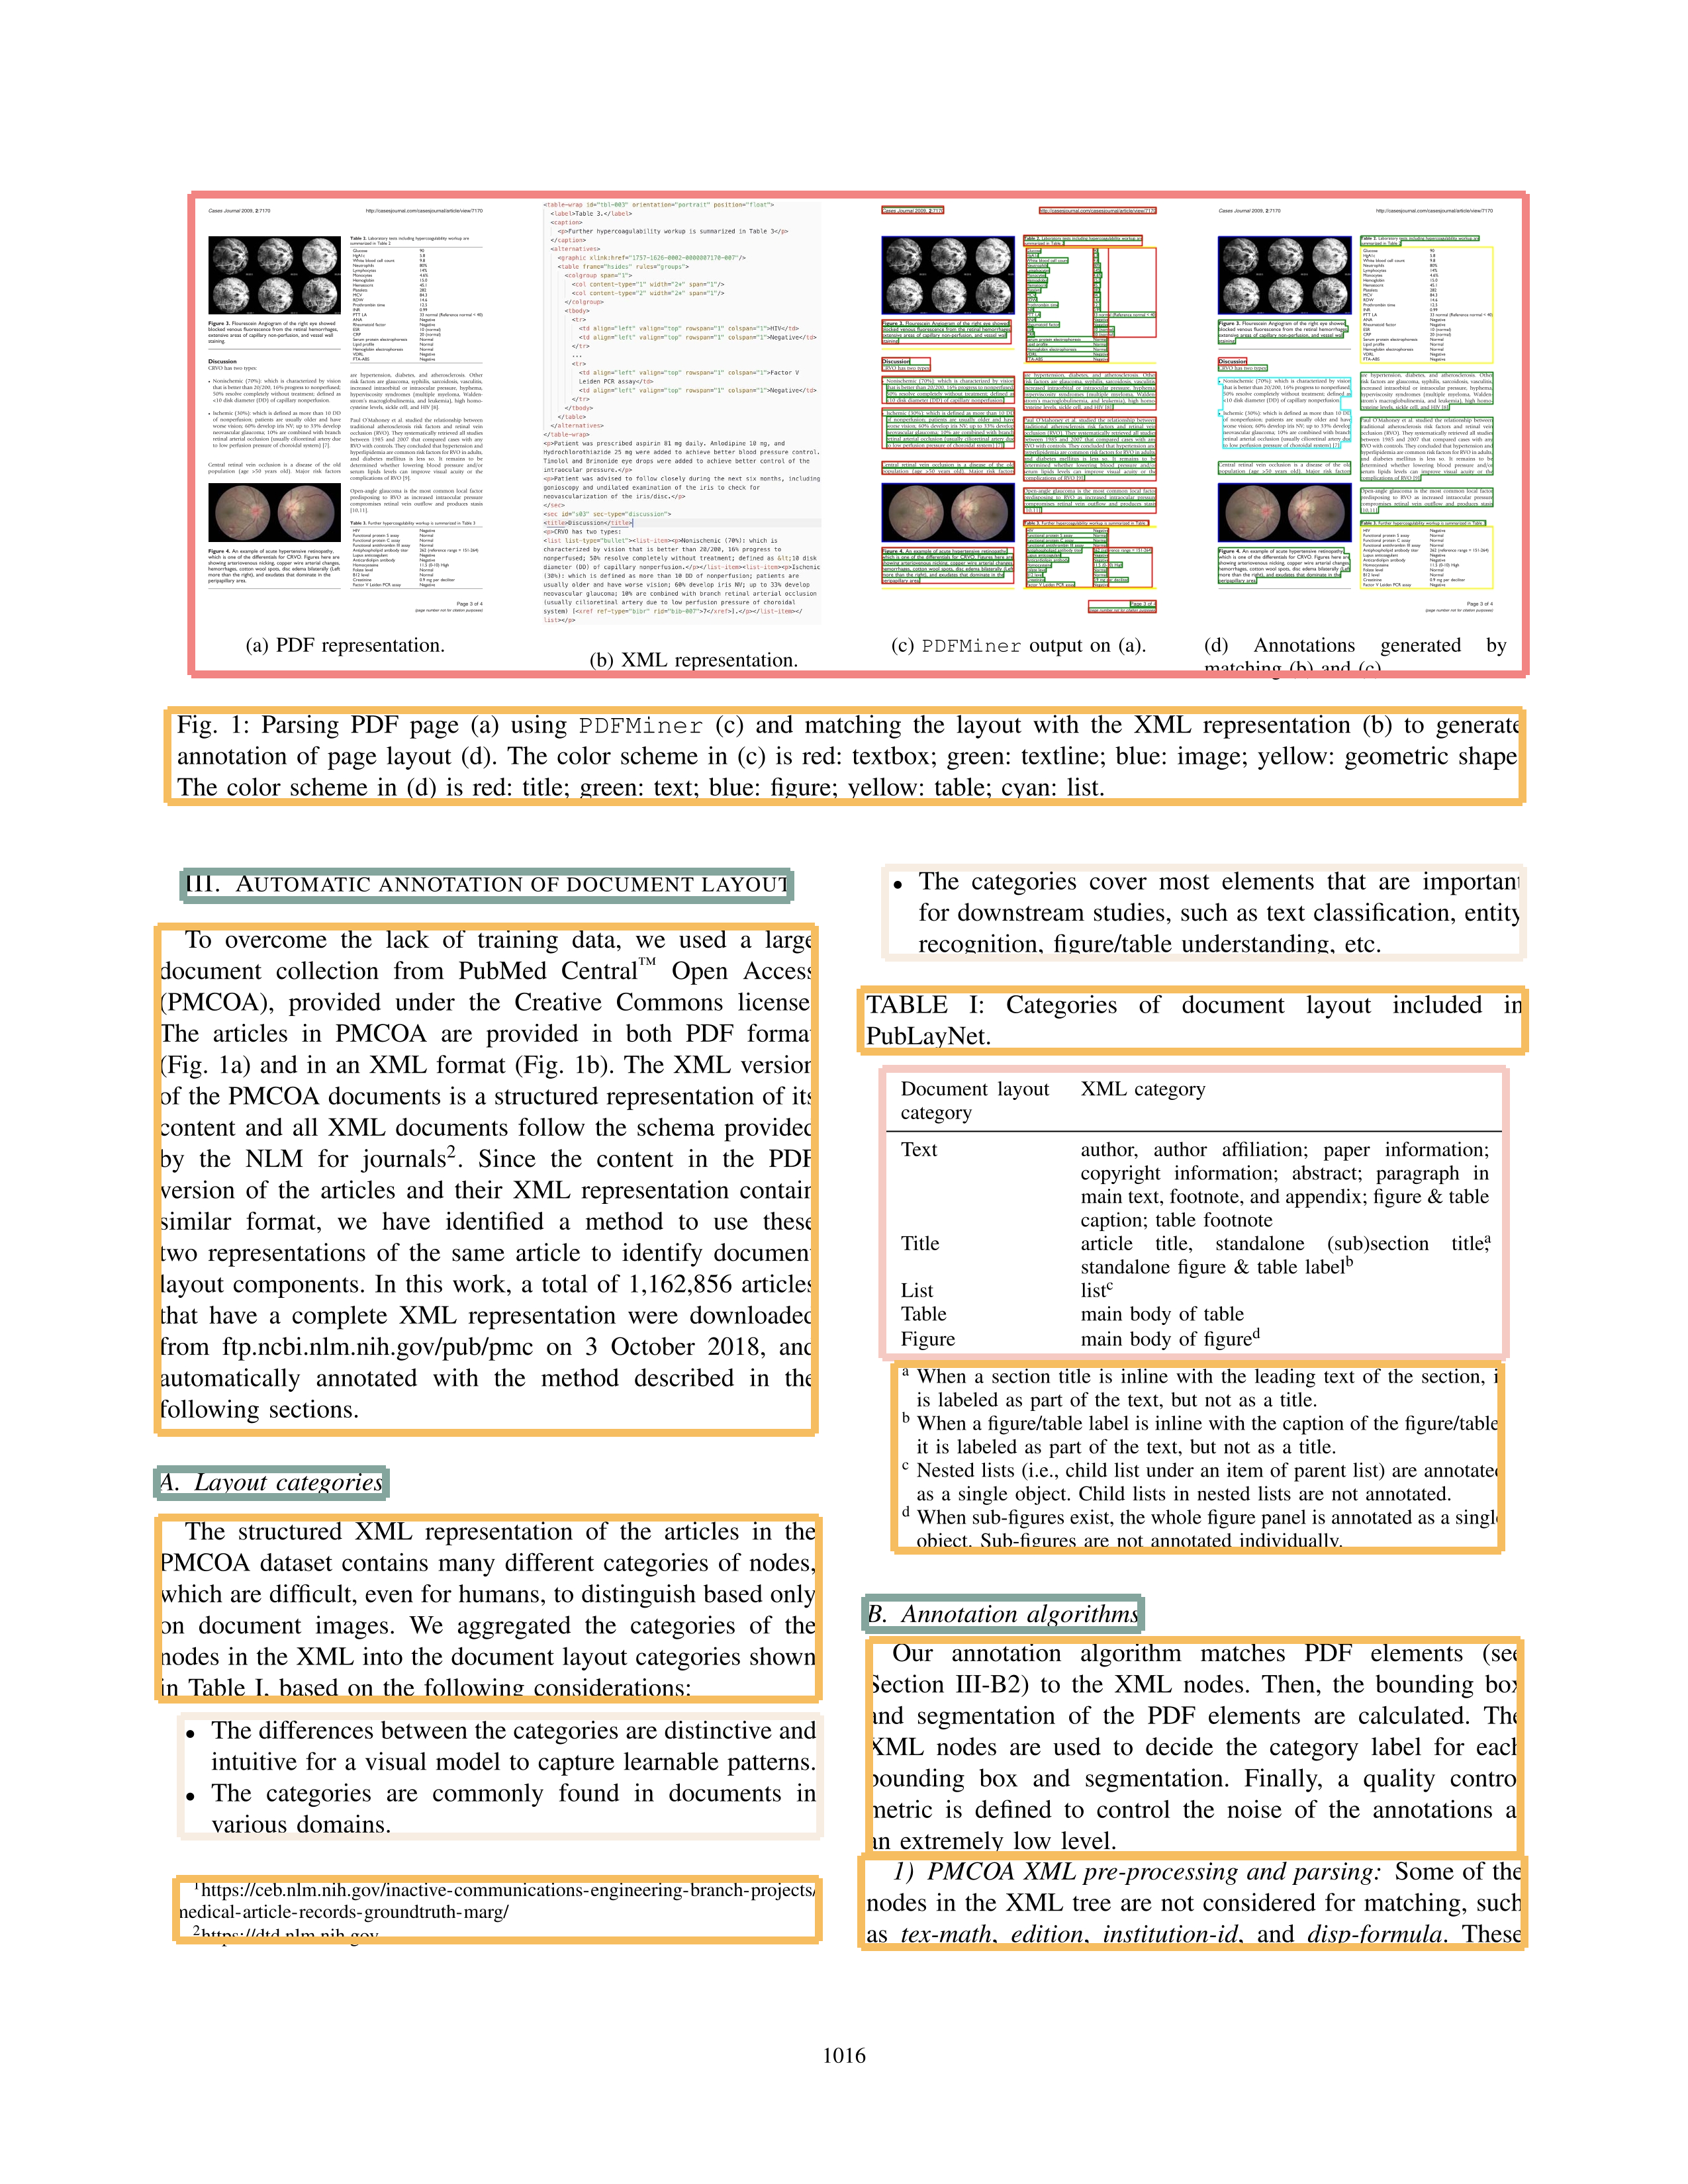

In [20]:
#call Detectron2 model to view image along with labeled boxes
model = lp.Detectron2LayoutModel('lp://PubLayNet/mask_rcnn_X_101_32x8d_FPN_3x/config',extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.65],
                                label_map={0: "Text", 1: "Title", 2: "List", 3:"Table", 4:"Figure"})
image_num=1
layout = model.detect(image_array[image_num])
lp.draw_box(image_array[image_num], layout,)

In [21]:
# Function to make left and right columns of PDF document in order
def image_order(image, text_blocks):
  h, w = image.shape[:2]
  left_interval = lp.Interval(0, w/2*1.05, axis='x').put_on_canvas(image)
  left_blocks = text_blocks.filter_by(left_interval, center=True)
  left_blocks.sort(key = lambda b:b.coordinates[1])
  right_blocks = [b for b in text_blocks if b not in left_blocks]
  right_blocks.sort(key = lambda b:b.coordinates[1])

  # And finally combine the two list and add the index according to the order
  text_blocks = lp.Layout([b.set(id = idx) for idx, b in enumerate(left_blocks + right_blocks)])
  return text_blocks

In [22]:
#Function to extract oldest reference based on year
%%writefile extract_old_ref.m
function [old_title,old_year] = extract_old_ref(txt_11)
    
    line_loc = regexp(txt_11,'----');
    %%
    counter=1;
    years_array = [];
    titles_cell = {};
    data_prev = '' ;
    for i = 1:length(line_loc)-1
    data_tmp = txt_11(line_loc(i)+6:line_loc(i+1)-3);
    sdd = regexp(data_tmp,'20[0-2][0-9]');
    if(~isempty(sdd))
    yr = data_tmp(sdd(1)+(0:3));
    years_array(counter) = str2num(yr);
    titles_cell{counter} = data_prev;
    counter = counter+1;
    % disp(yr)
    else
     sdd = regexp(data_tmp,'19[0-9][0-9]');
        if(~isempty(sdd))
            yr = data_tmp(sdd(1)+(0:3));
            years_array(counter) = str2num(yr);
            titles_cell{counter} = data_prev;
            counter = counter+1;
    %         disp(yr)
        else
    %      disp(data_tmp)
        end
    end
    data_prev = data_tmp;
    end
    
    [old_year,old_year_index] = min(years_array);

    if isempty(titles_cell)
        old_year_index = [];
        old_title = [];
    else
        old_title = titles_cell{old_year_index};
    end

    %old_title = titles_cell{old_year_index};
    end

Writing extract_old_ref.m


In [23]:
#Function to extract figure captions
%%writefile captions_extract.m
function [Caption,Sting_len] = captions_extract(txt_11)
txt_11 = [txt_11 '\n'];
e_ol = regexp(txt_11,'\n');
[fig_only,~]=     regexp(txt_11,'Fig. [0-9]');
[figure_only,~]=     regexp(txt_11,'Figure[.\s][0-9]');

fig_only = sort([fig_only figure_only]);
if(~isempty(fig_only))
Caption  = {};
for i = 1:length(fig_only)
    e_on = regexp(txt_11(fig_only(i):end),'\n');
    e_on = e_on(1);
    Caption{i} = txt_11(fig_only(i):fig_only(i)+e_on-3); %Name 
end
Sting_len  = cellfun(@(x) numel(x),Caption); %length of string

if isempty(Caption)
    Caption = [];
    Sting_len = [];
end
end

Writing captions_extract.m


In [24]:
#Function to extract table captions
%%writefile table_captions_extract.m
function [Caption,Sting_len] = table_captions_extract(txt_11)
txt_11 = [txt_11 '\n'];
e_ol = regexp(txt_11,'\n');
[Table,~]=     regexp(txt_11,'Table [0-9]');
[TABLE,~]=     regexp(txt_11,'TABLE[.\s][0-9]');

Table = sort([Table TABLE]);
if(~isempty(Table))
Caption  = {};
for i = 1:length(Table)
    e_on = regexp(txt_11(Table(i):end),'\n');
    e_on = e_on(1);
    Caption{i} = txt_11(Table(i):Table(i)+e_on-3); %Name 
end
Sting_len  = cellfun(@(x) numel(x),Caption); %length of string

if isempty(Caption)
    Caption = [];
    Sting_len = [];
end
end

Writing table_captions_extract.m


In [25]:
#Text Extraction
document = Document()
document.save('/content/drive/My Drive/Colab Notebooks/Project/Test Data/MLProject_Report_images/PDF_paragraphs.docx')
PDF_paras = open("/content/drive/My Drive/Colab Notebooks/Project/Test Data/MLProject_Report_images//PDF_paragraphs.docx", "w")

#Run the code for all images (pages of PDF document)
for idx,image in enumerate(image_array):

    layout = model.detect(image)
    lp.draw_box(image, layout,)

    text_blocks = lp.Layout([b for b in layout if b.type=="Text"])
    figure_blocks = lp.Layout([b for b in layout if b.type=="Figure"])
    text_blocks = lp.Layout([b for b in text_blocks \
                      if not any(b.is_in(b_fig) for b_fig in figure_blocks)])
    text_blocks = image_order(image,text_blocks)
    #lp.draw_box(image, text_blocks,box_width=3, show_element_id=True)

    #Run OCR Agent on each text block
    for block in text_blocks:
        segment_image = (block.pad(left=5, right=5, top=5, bottom=5).crop_image(image))
        text = ocr_agent.detect(segment_image)
        block.set(text=text, inplace=True)

    #join the sentence in the form of paragraphs
    sentence=["".join(txt) for txt in text_blocks.get_texts()]
    text = ".".join(sentence) 
    print(text)
    
    #Write text to document
    PDF_paras.write("%s\n" % text)

PDF_paras.close()

Abstract—Kkecognizing the layout of unstructured digital
documents is an important step when parsing the documents
into structured machine-readable format for downstream
applications. Deep neural networks that are developed for
computer vision have been proven to be an effective method
to analyze layout of document images. However, document
layout datasets that are currently publicly available are several
magnitudes smaller than established computing vision datasets.
Models have to be trained by transfer learning from a_ base
model that is pre-trained on a traditional computer vision
dataset. In this paper, we develop the PubLayNet dataset
for document layout analysis by automatically matching the
XML representations and the content of over 1 million PDF
articles that are publicly available on PubMed Central”. The
size of the dataset is comparable to established computer
vision datasets, containing over 360 thousand document images,
where typical document layout elements are annotated.

In [26]:
#Pargraphs headings extraction
document = Document()
document.save('/content/drive/My Drive/Colab Notebooks/Project/Test Data/MLProject_Report_images//PDF_Titles.docx')
PDF_Titles = open("/content/drive/My Drive/Colab Notebooks/Project/Test Data/MLProject_Report_images//PDF_Titles.docx", "w")

#Run the code for all images (pages of PDF document)
for idx,image in enumerate(image_array):

    layout = model.detect(image)
    lp.draw_box(image, layout,)

    text_blocks = lp.Layout([b for b in layout if b.type=="Title"])
    figure_blocks = lp.Layout([b for b in layout if b.type=="Figure"])
    text_blocks = lp.Layout([b for b in text_blocks \
                      if not any(b.is_in(b_fig) for b_fig in figure_blocks)])
    text_blocks = image_order(image,text_blocks)
    #lp.draw_box(image, text_blocks,box_width=3, show_element_id=True)

    #Run OCR Agent on each text block
    for block in text_blocks:
        segment_image = (block.pad(left=5, right=5, top=5, bottom=5).crop_image(image))
        text = ocr_agent.detect(segment_image)
        block.set(text=text, inplace=True)

    #join the sentence in the form of paragraphs
    sentence=["".join(txt) for txt in text_blocks.get_texts()]
    text = ".".join(sentence) 
    print(text)

    #Write titles to document
    PDF_Titles.write(str(text))

PDF_Titles.close()

PubLayNet: largest dataset ever for document
layout analysis

A. Layout categories
.II. AUTOMATIC ANNOTATION OF DOCUMENT LAYOUT
.B. Annotation algorithms


C. Data partition



In [27]:
#PDF Lists Extraction
document = Document()
document.save('/content/drive/My Drive/Colab Notebooks/Project/Test Data/MLProject_Report_images//PDF_Lists.docx')
PDF_Lists =open("/content/drive/My Drive/Colab Notebooks/Project/Test Data/MLProject_Report_images//PDF_Lists.docx", "w")

#Run the code for all images (pages of PDF document)
for idx,image in enumerate(image_array):

    layout = model.detect(image)
    lp.draw_box(image, layout,)

    text_blocks = lp.Layout([b for b in layout if b.type=="List"])
    figure_blocks = lp.Layout([b for b in layout if b.type=="Figure"])
    text_blocks = lp.Layout([b for b in text_blocks \
                      if not any(b.is_in(b_fig) for b_fig in figure_blocks)])
    text_blocks = image_order(image,text_blocks)
    #lp.draw_box(image, text_blocks,box_width=3, show_element_id=True)

    #Run OCR Agent on each text block
    for block in text_blocks:
        segment_image = (block.pad(left=-45, right=5, top=5, bottom=5).crop_image(image))
        text = ocr_agent.detect(segment_image)
        block.set(text=text, inplace=True)

    #join the sentence in the form of paragraphs
    sentence=["".join(txt) for txt in text_blocks.get_texts()]
    text = ".".join(sentence)
    print(text)

    PDF_Lists.write("%s\n" % text)

    #Remove the spaces from text
    extracted_text = text
    text_no_space=re.sub('\s', '',extracted_text)
    #print(text_no_space)

    #Divide the text based on ". This is done based on assumption that
    #in references, document title is always written in ""
    res2 = text_no_space.split('"')
    res3 ="\"\n----\n\"".join(res2) 
    #print(res3)

    #Sometimes such inverted commas (“) are used, so we need to cater these too
    res4  = res3.split('“')
    Ref_array ="\"\n----\n\"".join(res4) 
    #print(Ref_array)

    #Insert characters at the start and end of each line to extract oldest year
    start_char = "----\n"
    end_char = "\n----"
    Ref_array_new = start_char + Ref_array + end_char
    print(Ref_array_new)

    #Call MATLAB script to extract oldest reference
    Ref_array_new = Ref_array_new.encode(encoding='UTF-8',errors='strict')
    [old_title,old_year] =oc.extract_old_ref(Ref_array_new,nout=2)
    
    print('Oldest Title is: \n', old_title)
    print('Oldest Title year is: \n', old_year)
PDF_Lists.close()


----

----
Oldest Title is: 
 []
Oldest Title year is: 
 []
The differences between the categories are distinctive and
intuitive for a visual model to capture learnable patterns.
The categories are commonly found in documents in
various domains.
.The categories cover most elements that are important
for downstream studies, such as text classification, entity
recognition, figure/table understanding, etc.

----
Thedifferencesbetweenthecategoriesaredistinctiveandintuitiveforavisualmodeltocapturelearnablepatterns.Thecategoriesarecommonlyfoundindocumentsinvariousdomains..Thecategoriescovermostelementsthatareimportantfordownstreamstudies,suchastextclassification,entityrecognition,figure/tableunderstanding,etc.
----
Oldest Title is: 
 []
Oldest Title year is: 
 []
Sorted: including paper title, abstract, keywords, section
titles, and text in main text. The order of sorted XML
nodes matches the reading order in the PDF document.
Unsorted: including copyright statement, license, authors,
aff

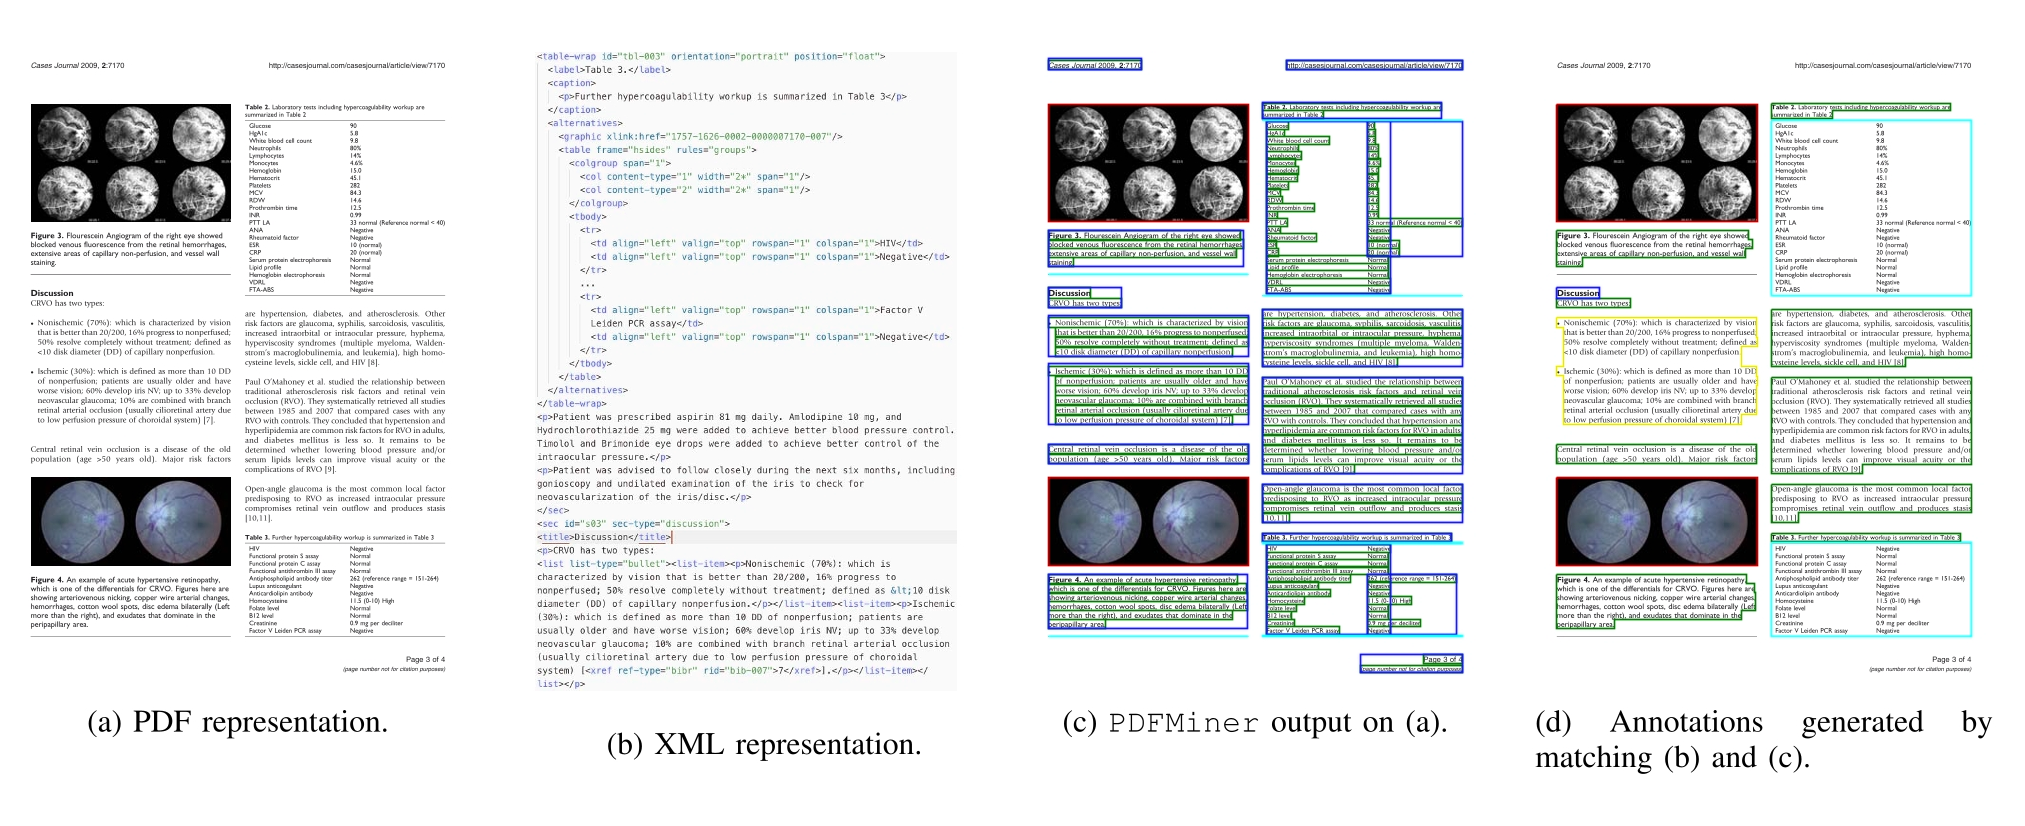

Captions of Figs are:
 []
Lengths of Captions are:
 []
height of figure is: 826
wide of figure is: 2025
Area of the image is:  1672650


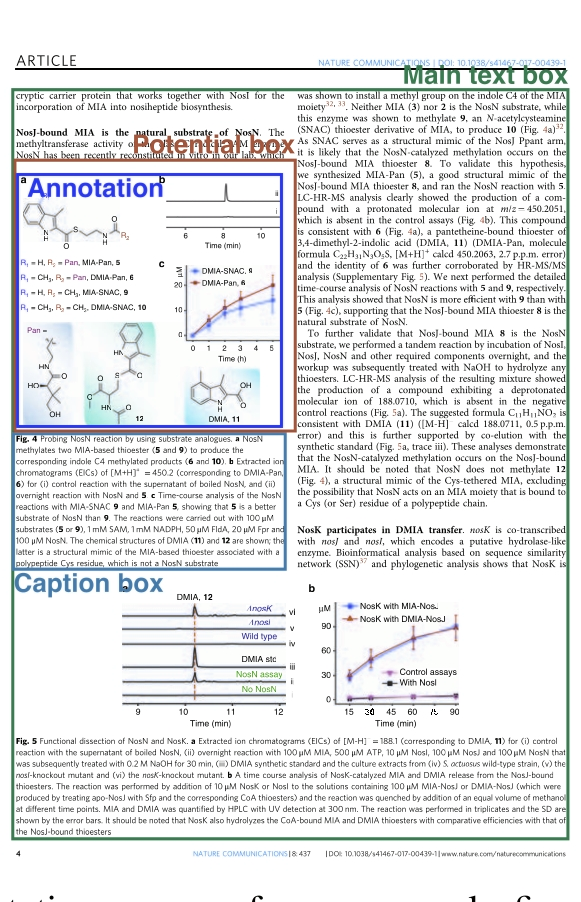

Captions of Figs are:
 [['Fig. 43']]
Lengths of Captions are:
 7.0
height of figure is: 902
wide of figure is: 581
Area of the image is:  524062


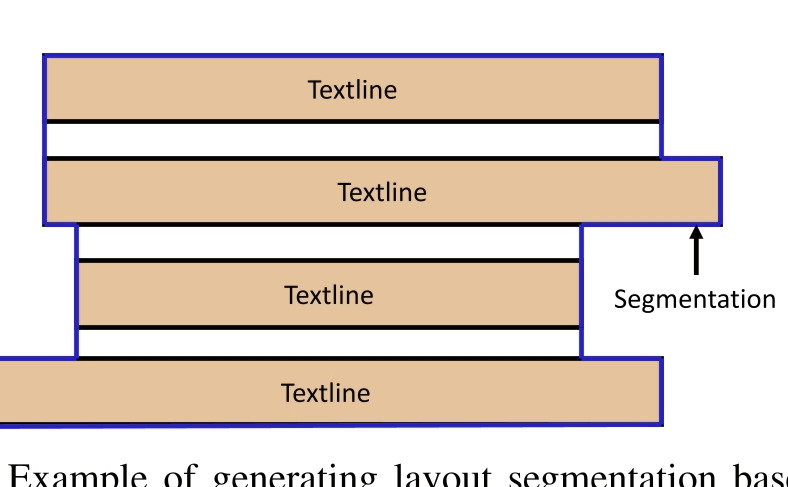

Captions of Figs are:
 []
Lengths of Captions are:
 []
height of figure is: 487
wide of figure is: 788
Area of the image is:  383756


In [28]:
#Run the code for all images (pages of PDF document)
for idx,image in enumerate(image_array):

    layout = model.detect(image)
    lp.draw_box(image, layout,)

    figure_blocks = lp.Layout([b for b in layout if b.type=="Figure"])
    figure_blocks = image_order(image,figure_blocks)
    #lp.draw_box(image, figure_blocks,box_width=3, show_element_id=True)
    counter = 0

    #Run OCR Agent on each figure block in order to extract caption
    for block in figure_blocks:
        segment_image = (block.pad(left=5, right=5, top=40, bottom=60).crop_image(image))
        counter += 1
        cv2_imshow(segment_image)
        #cv2.imwrite('/content/drive/My Drive/Colab Notebooks/Project/Test Data/MLProject_Report_images/Extracted_images/'+ str(block)+'.jpg',segment_image)
        text = ocr_agent.detect(segment_image)
        block.set(text=text, inplace=True)

        #join the sentence in the form of paragraphs      
        sentence=["".join(text)]
        text = ".".join(sentence)
        #print(text)

        #Insert characters at the start and end of each line
        start_char = "\n"
        end_char = "\n"
        Captions = start_char + text + end_char
        #print(Captions)

        #Call MATLAB script to extract figure captions
        Captions = Captions.encode(encoding='UTF-8',errors='strict')
        [Caption,Sting_len] =oc.captions_extract(Captions,nout=2)
        print('Captions of Figs are:\n',Caption)
        print('Lengths of Captions are:\n',Sting_len)

        #save image
        cv2.imwrite('/content/drive/My Drive/Colab Notebooks/Project/Test Data/MLProject_Report_images/Extracted_images/'+ str(Caption)+ str(int(counter)) +'.jpg',segment_image)

        #extract area of image
        height, width, _ = segment_image.shape
        print('height of figure is:',height)
        print('wide of figure is:', width)
        area = height * width
        print("Area of the image is: ", area)

    #sentence=["".join(txt) for txt in figure_blocks.get_texts()]
    #text = ".".join(sentence) 
    #print(text)

    #start_char = "\n"
    #end_char = "\n"
    #Captions = start_char + text + end_char
    #print(Captions)
    #Captions = Captions.encode(encoding='UTF-8',errors='strict')
    #[Caption,Sting_len] =oc.captions_extract(Captions,nout=2)
    #print('Captions of Figs are:\n',Caption)
    #print('Lengths of Captions are:\n',Sting_len)

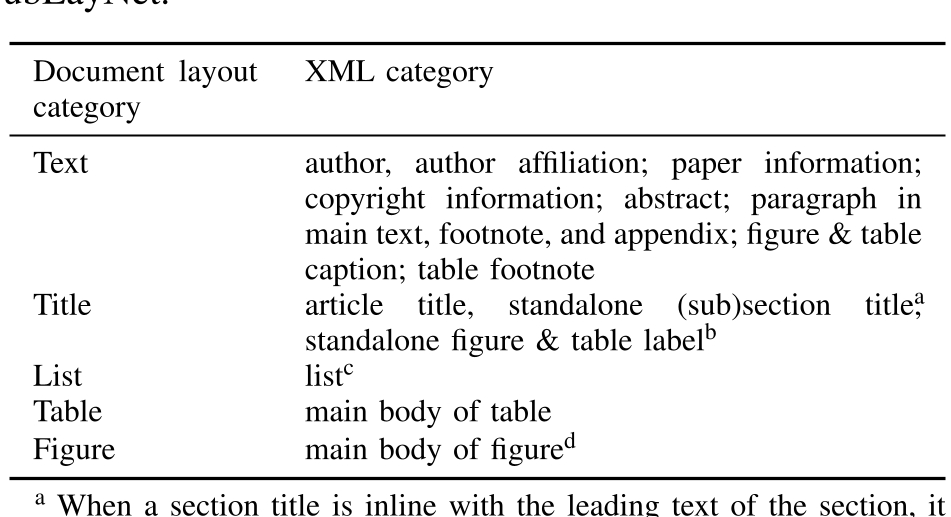

Captions of Tables are:
 []
Lengths of Captions are:
 []


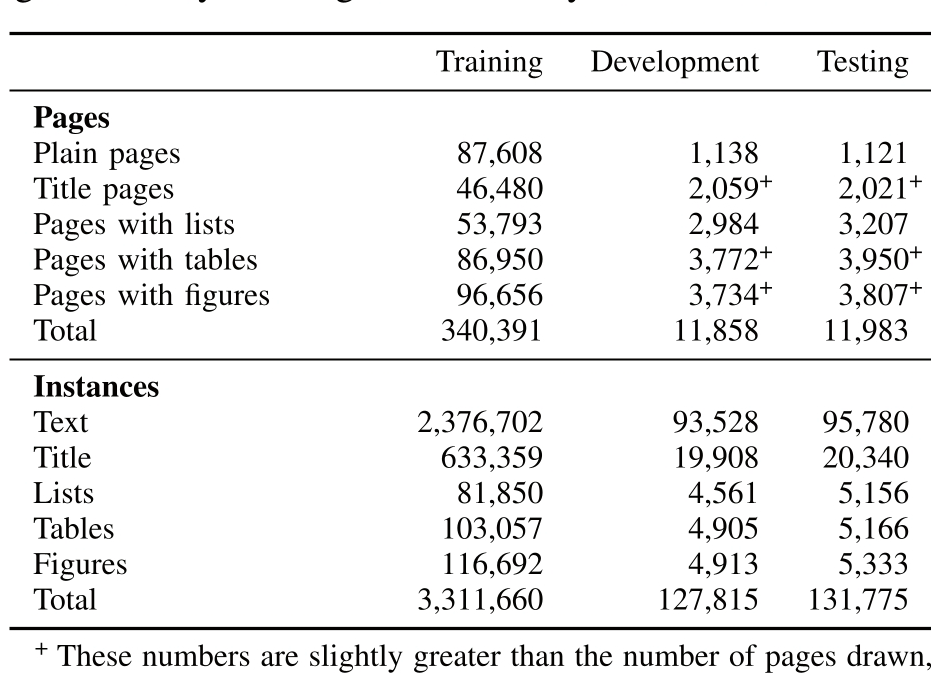

Captions of Tables are:
 []
Lengths of Captions are:
 []


In [29]:
#Run the code for all images (pages of PDF document)
document = Document()
document.save('/content/drive/My Drive/Colab Notebooks/Project/Test Data/MLProject_Report_images/Extracted_Tables/PDF_Tables_OCR.csv')
PDF_Tables =open("/content/drive/My Drive/Colab Notebooks/Project/Test Data/MLProject_Report_images/Extracted_Tables/PDF_Tables_OCR.csv", "w")

for idx,image in enumerate(image_array):

    layout = model.detect(image)
    lp.draw_box(image, layout,)

    text_blocks = lp.Layout([b for b in layout if b.type=="Table"])
    figure_blocks = lp.Layout([b for b in layout if b.type=="Figure"])
    text_blocks = lp.Layout([b for b in text_blocks \
                      if not any(b.is_in(b_fig) for b_fig in figure_blocks)])
    text_blocks = image_order(image,text_blocks)
    #lp.draw_box(image, text_blocks,box_width=3, show_element_id=True)

    #Run OCR Agent on each table block in order to extract caption
    for block in text_blocks:
        segment_image = (block.pad(left=5, right=5, top=40, bottom=40).crop_image(image))
        cv2_imshow(segment_image)
        #cv2.imwrite('/content/drive/My Drive/Colab Notebooks/Project/Test Data/MLProject_Report_images/Extracted_Tables/Test_table'+ str(block)+'.jpg',segment_image)
        text = ocr_agent.detect(segment_image)
        block.set(text=text, inplace=True)
        #print(block)

        #join the sentence in the form of paragraphs      
        sentence=["".join(text)]
        text = ".".join(sentence)
        #print(text)

        #Insert characters at the start and end of each line
        start_char = "\n"
        end_char = "\n"
        Captions = start_char + text + end_char
        #print(Captions)

        #Call MATLAB script to extract tables captions
        Captions = Captions.encode(encoding='UTF-8',errors='strict')
        [Caption,Sting_len] =oc.table_captions_extract(Captions,nout=2)
        print('Captions of Tables are:\n',Caption)
        print('Lengths of Captions are:\n',Sting_len)

        #save table as image
        cv2.imwrite('/content/drive/My Drive/Colab Notebooks/Project/Test Data/MLProject_Report_images/Extracted_Tables/Test_table'+ str(Caption)+ str(int(counter)) +'.jpg',segment_image)

    #extract text from each figure of table using OCR (above) 
    #Write the tables text in file      
    for txt in text_blocks.get_texts():
        #print(txt, end='\n---\n')   
        PDF_Tables.write("%s\n" % text)

PDF_Tables.close()
  
    #sentence=["".join(txt) for txt in text_blocks.get_texts()]
    #text = ".".join(sentence) 
    #print(text)

    #start_char = "\n"
    #end_char = "\n"
    #Captions = start_char + text + end_char
    #print(Captions)
    #Captions = Captions.encode(encoding='UTF-8',errors='strict')
    #[Caption,Sting_len] =oc.table_captions_extract(Captions,nout=2)
    #print('Captions of Tables are:\n',Caption)
    #print('Lengths of Captions are:\n',Sting_len)

In [30]:
#Extract table using tabula library
Table = tabula.read_pdf('/content/drive/My Drive/Colab Notebooks/Project/Test Data/MLProject_Report.pdf',pages='all')
#print(Table)
tabula.convert_into("/content/drive/My Drive/Colab Notebooks/Project/Test Data/MLProject_Report.pdf", "/content/drive/My Drive/Colab Notebooks/Project/Test Data/MLProject_Report_images/Extracted_Tables/PDF_Tables_Tabula.csv", output_format="csv", pages='all')

Jan 07, 2023 11:39:49 AM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
Jan 07, 2023 11:39:50 AM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
Jan 07, 2023 11:39:50 AM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
Jan 07, 2023 11:39:50 AM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
Jan 07, 2023 11:39:51 AM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
Jan 07, 2023 11:39:51 AM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
Jan 07, 2023 11:39:51 AM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
Jan 07, 2023 11:39:52 AM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
Jan 07, 2023 11:39:52 AM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
Jan 07, 2023 11:39:52 AM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
Jan 07, 2023 11:39:52 AM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
Jan 07, 2023 11:39:52 AM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>

Jan 07, 2023 11:39:54 AM org.apache.pdfbox.pdmodel.font.PDTrueT

*** Apply Sentiment Analysis***

In [31]:
#define functions
def remove_noise(tweet_tokens, stop_words = ()):

    cleaned_tokens = []

    for token, tag in pos_tag(tweet_tokens):
        token = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', token)
        token = re.sub("(@[A-Za-z0-9_]+)","", token)

        if tag.startswith("NN"):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'

        lemmatizer = WordNetLemmatizer()
        token = lemmatizer.lemmatize(token, pos)

        if len(token) > 0 and token not in string.punctuation and token.lower() not in stop_words:
            cleaned_tokens.append(token.lower())
    return cleaned_tokens

def get_all_words(cleaned_tokens_list):
    for tokens in cleaned_tokens_list:
        for token in tokens:
            yield token

def get_tweets_for_model(cleaned_tokens_list):
    for tweet_tokens in cleaned_tokens_list:
        yield dict([token, True] for token in tweet_tokens)

In [38]:
text = textract.process("/content/drive/My Drive/Colab Notebooks/Project/Test Data/MLProject_Report_images/PDF_paragraphs.docx")

#Write main function
if __name__ == "__main__":

    positive_tweets = twitter_samples.strings('positive_tweets.json')
    negative_tweets = twitter_samples.strings('negative_tweets.json')
    text = twitter_samples.strings('tweets.20150430-223406.json')
    tweet_tokens = twitter_samples.tokenized('positive_tweets.json')[0]

    stop_words = stopwords.words('english')

    positive_tweet_tokens = twitter_samples.tokenized('positive_tweets.json')
    negative_tweet_tokens = twitter_samples.tokenized('negative_tweets.json')

    positive_cleaned_tokens_list = []
    negative_cleaned_tokens_list = []

    for tokens in positive_tweet_tokens:
        positive_cleaned_tokens_list.append(remove_noise(tokens, stop_words))

    for tokens in negative_tweet_tokens:
        negative_cleaned_tokens_list.append(remove_noise(tokens, stop_words))

    all_pos_words = get_all_words(positive_cleaned_tokens_list)

    freq_dist_pos = FreqDist(all_pos_words)
    #print(freq_dist_pos.most_common(10))

    positive_tokens_for_model = get_tweets_for_model(positive_cleaned_tokens_list)
    negative_tokens_for_model = get_tweets_for_model(negative_cleaned_tokens_list)

    positive_dataset = [(tweet_dict, "Positive")
                         for tweet_dict in positive_tokens_for_model]

    negative_dataset = [(tweet_dict, "Negative")
                         for tweet_dict in negative_tokens_for_model]

    dataset = positive_dataset + negative_dataset

    random.shuffle(dataset)

    train_data = dataset[:7000]
    test_data = dataset[7000:]

    classifier = NaiveBayesClassifier.train(train_data)

    print("Accuracy is:", classify.accuracy(classifier, test_data))

BadZipFile: ignored

In [ ]:
#Run sentiment analysis
custom_tokens = remove_noise(word_tokenize(text_for_analysis))
print(classifier.classify(dict([token, True] for token in custom_tokens)))

In [ ]:
#do frequency analysis
tokenized_word=word_tokenize(custom_tweet)
print(tokenized_word)

fdist = FreqDist(tokenized_word)
print(fdist)

fdist.plot(30,cumulative=False)
plt.show()
fdist.most_common(5)

In [ ]:
#Perform filtering of sto words
stop_words=set(stopwords.words("english"))
stop_words.add('The')
stop_words.add('n\'t')
stop_words.add('You')
stop_words.add(',')
stop_words.add('.')
stop_words.add('(')
stop_words.add(')')
stop_words.add('\n')

filtered_sent=[]
for w in tokenized_word:
    if w not in stop_words:
        filtered_sent.append(w)
print("Tokenized Sentence:",tokenized_word)
print("Filterd Sentence:",filtered_sent)

fdist = FreqDist(filtered_sent)
print(fdist)

fdist.plot(30,cumulative=False)
plt.show()
fdist.most_common(5)